# Liquid Laundry Dataset

Importing - Upon importing the dataset, you will notice that some tweaking might be necessary.
Try to adjust the import parameters directly in order to import the database effectively.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('LLDB-data.csv', sep='|', header=1, index_col=0)
df

,Occasion,Household,Week,Loyalty,Price,Feature,Display,Tide,Wisk,Era,Choice
0,1,9,11,0.00,4.67,0,0,1,0,0,1
1,1,9,11,0.62,4.98,0,0,0,1,0,0
2,1,9,11,0.31,5.38,0,0,0,0,1,0
3,1,9,11,0.00,4.98,0,0,0,0,0,0
4,2,9,29,0.00,4.67,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1387,347,289,32,0.43,4.22,0,0,0,0,0,1
1388,348,289,37,0.00,5.28,0,0,1,0,0,0
1389,348,289,37,0.43,4.89,0,0,0,1,0,0
1390,348,289,37,0.14,4.92,0,0,0,0,1,0


In [4]:
df.describe()

,Occasion,Household,Week,Loyalty,Price,Feature,Display,Tide,Wisk,Era,Choice
count,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000
mean,174.500000,173.416667,25.204023,0.246976,5.404555,0.062500,0.097701,0.250000,0.250000,0.250000,0.250000
std,100.494636,86.324527,16.451616,0.353258,0.879605,0.242148,0.297017,0.433168,0.433168,0.433168,0.433168
min,1.000000,9.000000,1.000000,0.000000,3.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.750000,127.250000,10.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,174.500000,201.000000,26.000000,0.000000,5.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,261.250000,240.250000,41.000000,0.400000,6.450000,0.000000,0.000000,0.250000,0.250000,0.250000,0.250000
max,348.000000,289.000000,52.000000,1.000000,7.020000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Verify that there are 52 households and 348 purchase occasions

In [5]:
households = df['Household'].nunique()
occasions = df['Occasion'].nunique()
print(f'Number of households: {households}')
print(f'Number of occasions: {occasions}')

Number of households: 52
Number of occasions: 348


Regardless of brand, determine overall average price and percentage of time/occasions brands were on feature and on display

In [18]:
mean = df['Price'].mean()
print(f'The average price of the liquid laundry detergents in the dataset is: {mean:.2f} cents.')

The average price of the liquid laundry detergents in the dataset is: 5.40 cents.


In [19]:
perc_feature = df['Feature'].sum() / len(df) * 100
print(f'The percentage of occasions the brand was featured in the store’s advertising is: {perc_feature}%.')

The percentage of occasions the brand was featured in the store’s advertising is: 6.25%.


In [21]:
perc_display = df['Display'].sum() / len(df) * 100
print(f'The percentage of occasions the brand was specially displayed in the store is: {perc_display:.2f}%.')

The percentage of occasions the brand was specially displayed in the store is: 9.77%.


Create a new column “Brand” reporting a 1-4 number representing the brand relevant for each observation (1=Tide, 2=Wisk, 3=Era, and 4=Surf)

In [9]:
df.loc[df['Tide'] == 1, 'Brand'] = 'Tide'
df.loc[df['Wisk'] == 1, 'Brand'] = 'Wisk'
df.loc[df['Era'] == 1, 'Brand'] = 'Era'
df['Brand'].fillna('Surf', inplace=True)
df


/var/folders/85/5nsqwlmd1xx9qfh9rn8rll2c0000gn/T/ipykernel_44599/564921887.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Brand'].fillna('Surf', inplace=True)


,Occasion,Household,Week,Loyalty,Price,Feature,Display,Tide,Wisk,Era,Choice,Brand
0,1,9,11,0.00,4.67,0,0,1,0,0,1,Tide
1,1,9,11,0.62,4.98,0,0,0,1,0,0,Wisk
2,1,9,11,0.31,5.38,0,0,0,0,1,0,Era
3,1,9,11,0.00,4.98,0,0,0,0,0,0,Surf
4,2,9,29,0.00,4.67,0,0,1,0,0,0,Tide
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,347,289,32,0.43,4.22,0,0,0,0,0,1,Surf
1388,348,289,37,0.00,5.28,0,0,1,0,0,0,Tide
1389,348,289,37,0.43,4.89,0,0,0,1,0,0,Wisk
1390,348,289,37,0.14,4.92,0,0,0,0,1,0,Era


Compute the market share for each brand in this dataset

In [23]:
tide = df[df['Brand'] == 'Tide'].value_counts().sum()
wisk = df[df['Brand'] == 'Wisk'].value_counts().sum()
era = df[df['Brand'] == 'Era'].value_counts().sum()
surf = df[df['Brand'] == 'Surf'].value_counts().sum()

tide_share = tide / len(df) * 100
wisk_share = wisk / len(df) * 100
era_share = era / len(df) * 100
surf_share = surf / len(df) * 100

print(f'Tide has a market share of {tide_share:.0f}%.')
print(f'Wisk has a market share of {wisk_share:.0f}%.')
print(f'Era has a market share of {era_share:.0f}%.')
print(f'Surf has a market share of {surf_share:.0f}%.')

Tide has a market share of 25%.
Wisk has a market share of 25%.
Era has a market share of 25%.
Surf has a market share of 25%.


Compute average price and feature/display frequency, separately for each brand

In [11]:
for brand in df['Brand'].unique():
    brand_df = df[df['Brand'] == brand]
    mean_price = brand_df['Price'].mean()
    perc_feature = brand_df['Feature'].sum() / len(brand_df) * 100
    perc_display = brand_df['Display'].sum() / len(brand_df) * 100
    print(f'{brand} has an average price of {mean_price:.2f} cents.')
    print(f'{brand} is featured in {perc_feature:.2f}% of occasions.')
    print(f'{brand} is displayed in {perc_display:.2f}% of occasions.')
    print()

Tide has an average price of 5.86 cents.
Tide is featured in 6.32% of occasions.
Tide is displayed in 14.08% of occasions.

Wisk has an average price of 4.65 cents.
Wisk is featured in 10.34% of occasions.
Wisk is displayed in 17.53% of occasions.

Era has an average price of 5.96 cents.
Era is featured in 2.59% of occasions.
Era is displayed in 3.16% of occasions.

Surf has an average price of 5.15 cents.
Surf is featured in 5.75% of occasions.
Surf is displayed in 4.31% of occasions.



Plot purchases per week

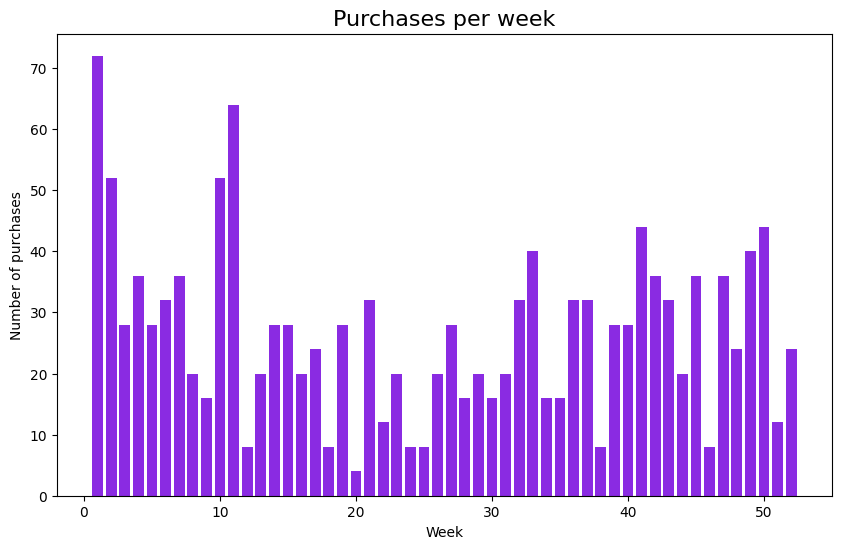

In [12]:
purchases_per_week = df.groupby('Week')['Occasion'].count().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(purchases_per_week['Week'], purchases_per_week['Occasion'], color='blueviolet')
plt.title('Purchases per week', fontsize=16)
plt.xlabel('Week')
plt.ylabel('Number of purchases')
plt.show()


Find households that are most/least frequent buyers of liquid laundry detergent

In [13]:
household_frequency = df.groupby('Household')['Occasion'].count().reset_index()
household_frequency.sort_values('Occasion', ascending=False, inplace=True)

In [14]:
top_clients = household_frequency.head(20)
top_clients

,Household,Occasion
45,269,56
33,208,56
30,203,52
16,154,48
34,219,48
29,201,48
7,42,40
35,223,36
6,34,36
42,264,36


In [15]:
less_clients = household_frequency.tail(20)
less_clients

,Household,Occasion
28,192,20
25,184,20
4,16,20
23,171,20
21,166,20
1,11,20
15,147,20
18,157,16
8,43,16
11,113,16


Do low prices increase sales (as one might expect)? Could this data help answer this question? Experiment with approaches (including graphical) to validate this hypothesis based on this dataset

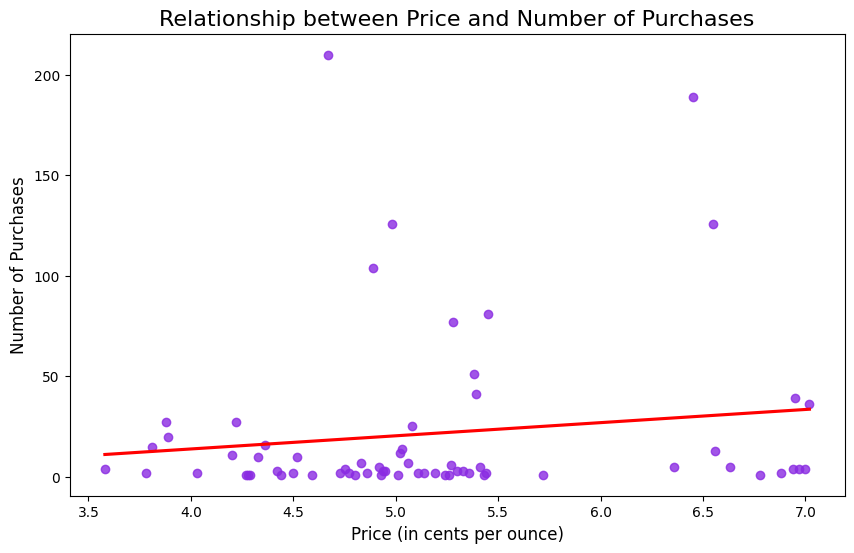

In [16]:
sales_per_price = df.groupby('Price')['Occasion'].count().reset_index()

plt.figure(figsize=(10,6))
sns.regplot(x='Price', y='Occasion', data=sales_per_price, scatter_kws={'color':'blueviolet'}, line_kws={'color':'red'}, ci=None)

plt.title('Relationship between Price and Number of Purchases', fontsize=16)
plt.xlabel('Price (in cents per ounce)', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

plt.show()

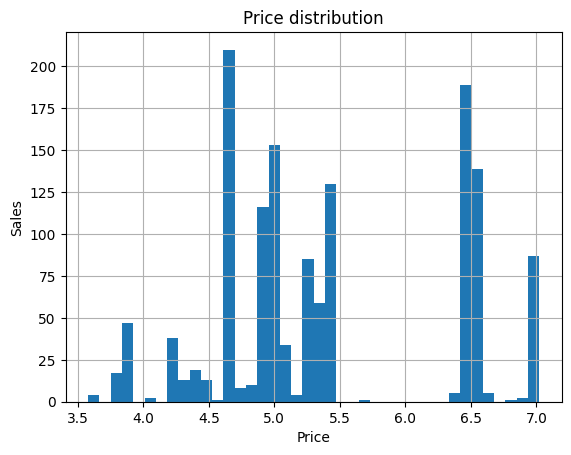

In [29]:
df['Price'].hist(bins=40)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

Price distribution across brands

/var/folders/85/5nsqwlmd1xx9qfh9rn8rll2c0000gn/T/ipykernel_44599/859255346.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y = 'Price', data=df, palette='viridis')


Text(0, 0.5, 'Price (in cents per ounce)')

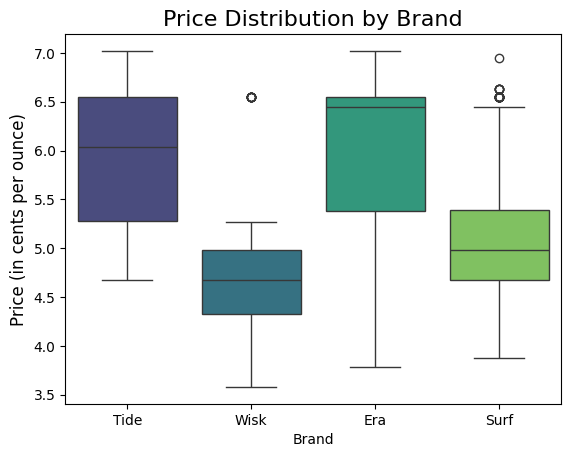

In [26]:
sns.boxplot(x='Brand', y = 'Price', data=df, palette='viridis')
plt.title('Price Distribution by Brand', fontsize=16)
plt.ylabel('Price (in cents per ounce)', fontsize=12)